In [2]:
import pandas as pd
import numpy as np
from model import Network
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, ScalarFormatter


In [3]:
df_tmp = pd.read_csv("data/temperature-anomaly.csv")
df_tmp = df_tmp[df_tmp["Entity"] == "World"]
df_tmp = df_tmp[df_tmp["Year"] >= 1990]
df_tmp = df_tmp[["Year", "Global"]][:-3]
df_tmp = df_tmp.rename(columns={"Year": "year", "Global": "temp_anomaly"})


In [4]:
df_ems = pd.read_csv("data/ghg-emissions-by-sector.csv")
df_ems = df_ems[df_ems["Entity"] == "World"]
df_ems = df_ems[
    [
        "Year",
        "Agriculture",
        "land-use change and forestry",
        "waste",
        "buildings",
        "industry",
        "manufacturing and construction",
        "transport",
        "electricity and heat",
        "Fugitive emissions from energy production",
        "other fuel combustion","bunker fuels",
    ]
]
df_ems = df_ems.rename(
    columns={
        "Year": "year",
        "Agriculture": "agriculture",
        "land-use change and forestry": "land_use_forestry",
        "waste": "waste",
        "buildings": "buildings",
        "industry": "industry",
        "manufacturing and construction": "manufacturing_construction",
        "transport": "transport",
        "electricity and heat": "electricity_heat",
        "Fugitive emissions from energy production": "fugitive_energy",
        "other fuel combustion": "other_fuel",
        "bunker fuels": "bunker_fuels",
    }
)


In [5]:
df = pd.merge(df_tmp, df_ems, on="year", how="inner")


In [6]:
df["cum_agriculture"] = df["agriculture"].cumsum()
df["cum_land_use_forestry"] = df["land_use_forestry"].cumsum()
df["cum_waste"] = df["waste"].cumsum()
df["cum_buildings"] = df["buildings"].cumsum()
df["cum_industry"] = df["industry"].cumsum()
df["cum_manufacturing_construction"] = df["manufacturing_construction"].cumsum()
df["cum_transport"] = df["transport"].cumsum()
df["cum_electricity_heat"] = df["electricity_heat"].cumsum()
df["cum_fugitive_energy"] = df["fugitive_energy"].cumsum()
df["cum_other_fuel"] = df["other_fuel"].cumsum()
df["cum_bunker_fuels"] = df["bunker_fuels"].cumsum()

X = df[["cum_agriculture",
    "cum_land_use_forestry",
    "cum_waste",
    "cum_industry",
    "cum_buildings",
    "cum_manufacturing_construction",
    "cum_transport",
    "cum_electricity_heat",
    "cum_fugitive_energy",
    "cum_other_fuel",
    "cum_bunker_fuels"
]]

y = df[["temp_anomaly"]]

Xn = pd.DataFrame()

for col in X.columns:
    Xn[col] = (X[col] - X[col].min()) / (X[col].max() - X[col].min())

yn = (y - y.min()) / (y.max() - y.min())

X_np = Xn.to_numpy()
y_np = yn.to_numpy()


In [8]:
model = Network([11, 32, 32, 1])
loss = model.train(X_np, y_np, 0.01, 1000000, None, False, 100)


Network initialized. Layer shapes: [((32, 11), (1, 32)), ((32, 32), (1, 32)), ((1, 32), (1, 1))]
Step: 100, Loss: 0.032464112181629146
Step: 200, Loss: 0.017745204785132727
Step: 300, Loss: 0.014500458956993046
Step: 400, Loss: 0.012271986510801525
Step: 500, Loss: 0.010507628106646577
Step: 600, Loss: 0.009158930741095122
Step: 700, Loss: 0.008174571337337216
Step: 800, Loss: 0.0074711974179533635
Step: 900, Loss: 0.006987224433515267
Step: 1000, Loss: 0.006665416906912316
Step: 1100, Loss: 0.006453206695960132
Step: 1200, Loss: 0.006313762840261391
Step: 1300, Loss: 0.006224141979549824
Step: 1400, Loss: 0.006164938561535522
Step: 1500, Loss: 0.006125731980763929
Step: 1600, Loss: 0.006099544344795387
Step: 1700, Loss: 0.006081841710508486
Step: 1800, Loss: 0.0060687584479916686
Step: 1900, Loss: 0.006059189507433078
Step: 2000, Loss: 0.006053294656046846
Step: 2100, Loss: 0.006049367955375845
Step: 2200, Loss: 0.0060463755284126145
Step: 2300, Loss: 0.0060440433439679815
Step: 2400,

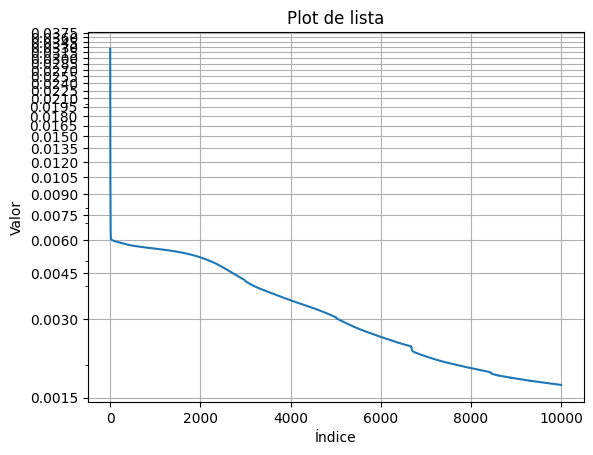

In [9]:
x = list(range(len(loss)))

plt.plot(x, loss, marker="")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.title("Plot de lista")
plt.yscale("log")
plt.grid(True)

ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(nbins=25, prune=None))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.get_offset_text().set_visible(False)

plt.show()


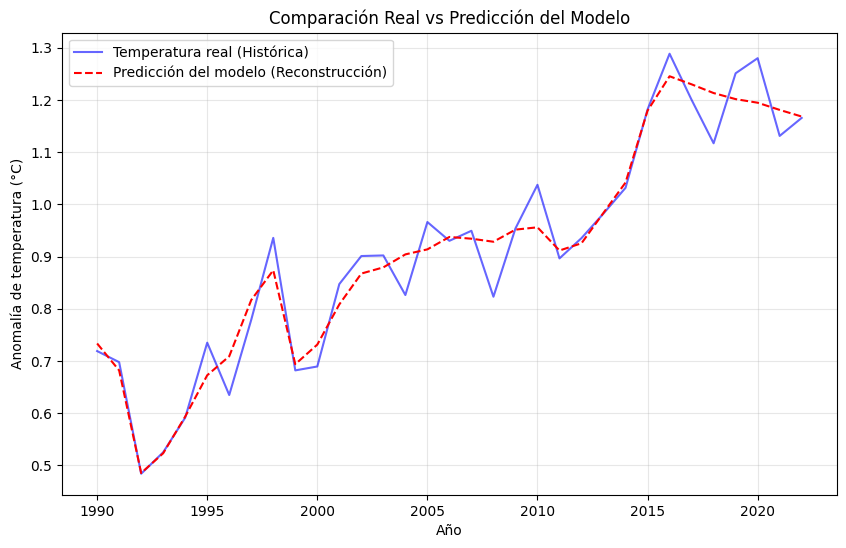

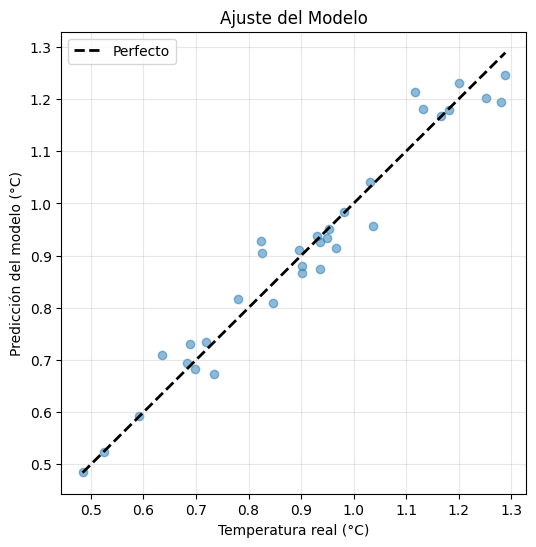

In [11]:
y_pred_norm = model.predict(X_np)[0]
y_min = df["temp_anomaly"].min()
y_max = df["temp_anomaly"].max()
y_pred = y_pred_norm * (y_max - y_min) + y_min
y_real = df["temp_anomaly"]

plt.figure(figsize=(10, 6))
plt.plot(
    df["year"], y_real, label="Temperatura real (Histórica)", color="blue", alpha=0.6
)
plt.plot(
    df["year"],
    y_pred.flatten(),
    label="Predicción del modelo (Reconstrucción)",
    color="red",
    linestyle="--",
)
plt.xlabel("Año")
plt.ylabel("Anomalía de temperatura (°C)")
plt.title("Comparación Real vs Predicción del Modelo")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


plt.figure(figsize=(6, 6))
plt.scatter(y_real, y_pred.flatten(), alpha=0.5)
min_val = min(y_real.min(), y_pred.min())
max_val = max(y_real.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], "k--", lw=2, label="Perfecto")

plt.xlabel("Temperatura real (°C)")
plt.ylabel("Predicción del modelo (°C)")
plt.title("Ajuste del Modelo")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


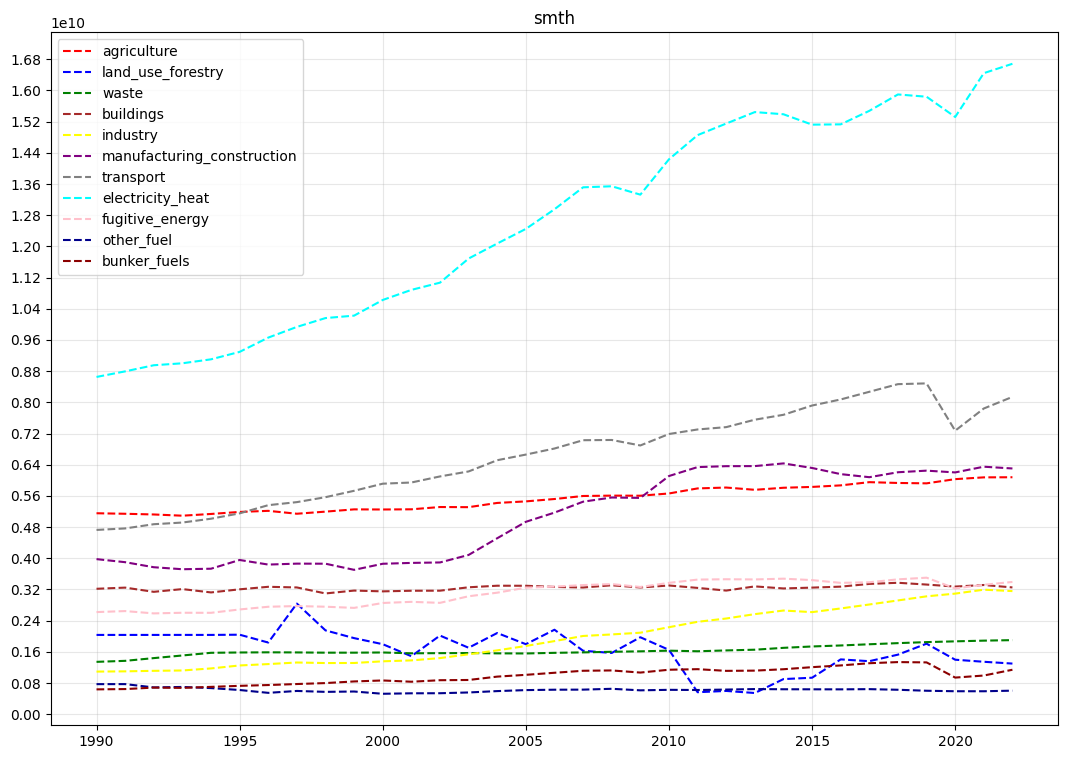

In [12]:
plt.figure(figsize=(13, 9))
plt.plot(
    df["year"], df["agriculture"], label="agriculture", color="red", linestyle="--"
)
plt.plot(
    df["year"],
    df["land_use_forestry"],
    label="land_use_forestry",
    color="blue",
    linestyle="--",
)
plt.plot(df["year"], df["waste"], label="waste", color="green", linestyle="--")
plt.plot(
    df["year"], df["buildings"], label="buildings", color="brown", linestyle="--"
)
plt.plot(df["year"], df["industry"], label="industry", color="yellow", linestyle="--")
plt.plot(
    df["year"],
    df["manufacturing_construction"],
    label="manufacturing_construction",
    color="purple",
    linestyle="--",
)
plt.plot(
    df["year"], df["transport"], label="transport", color="gray", linestyle="--"
)
plt.plot(
    df["year"],
    df["electricity_heat"],
    label="electricity_heat",
    color="cyan",
    linestyle="--",
)
plt.plot(
    df["year"],
    df["fugitive_energy"],
    label="fugitive_energy",
    color="pink",
    linestyle="--",
)
plt.plot(
    df["year"], df["other_fuel"], label="other_fuel", color="darkblue", linestyle="--"
)
plt.plot(
    df["year"],
    df["bunker_fuels"],
    label="bunker_fuels",
    color="darkred",
    linestyle="--",
)
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(nbins=25, prune=None))
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.xlabel("")
plt.ylabel("")
plt.title("smth")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Sistema inicializado en el año 2022
Sectores detectados: 11
Simulador con Física Corregida Listo.


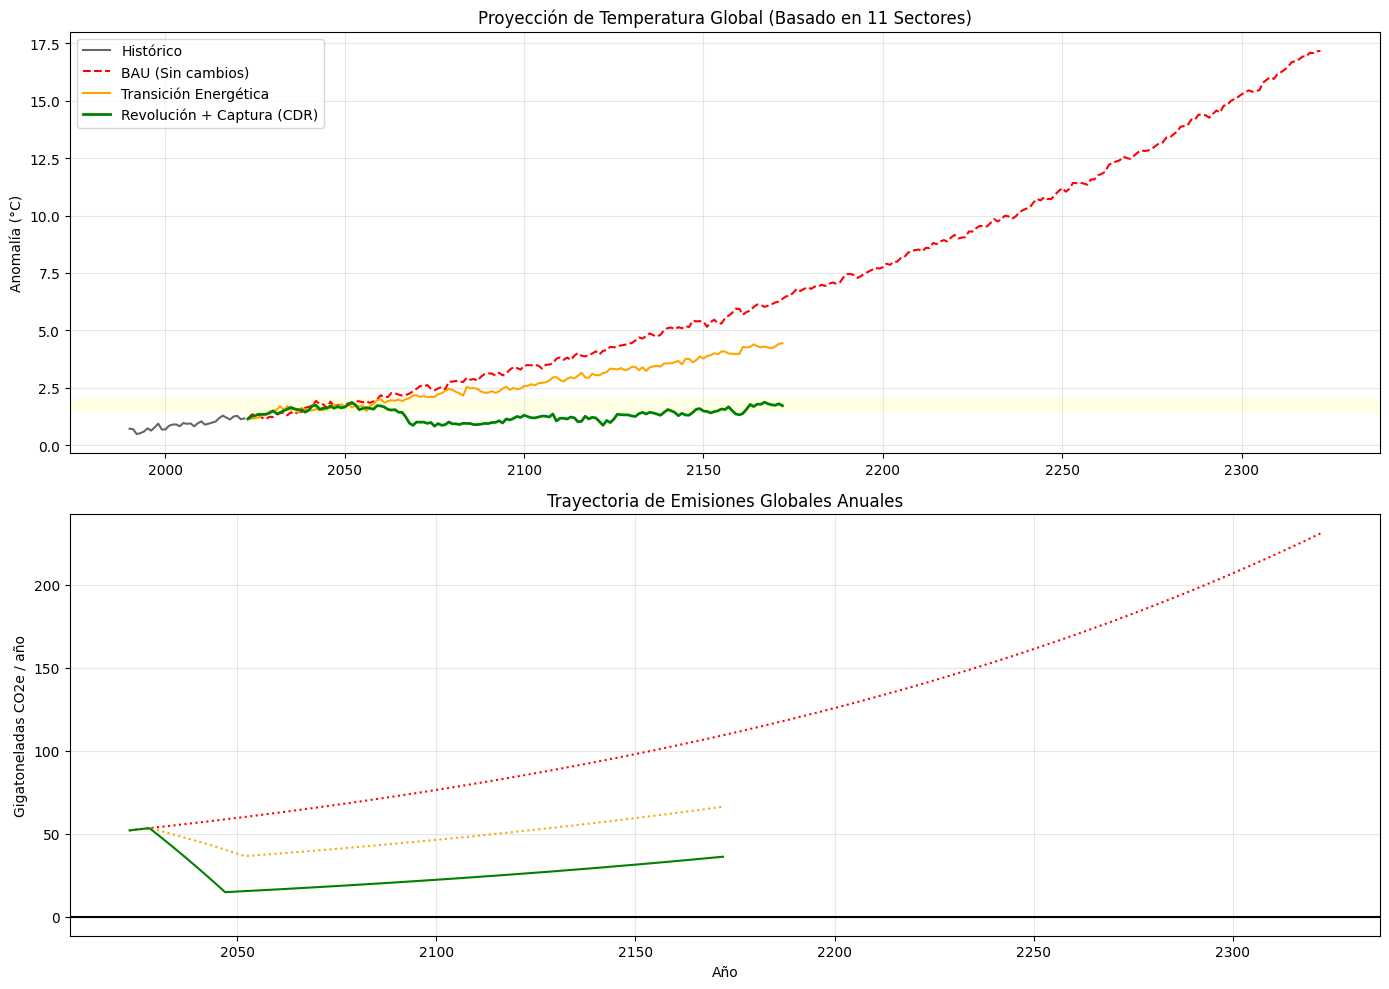

Temp Final BAU: 17.17°C
Temp Final Transición: 4.44°C
Temp Final Verde: 1.72°C


In [ ]:
SECTOR_COLS = [
    "agriculture",
    "land_use_forestry",
    "waste",
    "industry",
    "buildings",
    "manufacturing_construction",
    "transport",
    "electricity_heat",
    "fugitive_energy",
    "other_fuel",
    "bunker_fuels",
]
X_COLS = [f"cum_{col}" for col in SECTOR_COLS]


x_mins = X.min().values
x_maxs = X.max().values

y_min_val = y["temp_anomaly"].min()
y_max_val = y["temp_anomaly"].max()


last_year_idx = df.index[-1]
current_year = df.loc[last_year_idx, "year"]
last_cum_values = df.loc[last_year_idx, X_COLS].values
last_annual_values = df.loc[last_year_idx, SECTOR_COLS].values


class MultiSectorSimulator:
    def __init__(
        self,
        model,
        x_mins,
        x_maxs,
        y_min,
        y_max,
        last_cum_values,
        last_annual_values,
        sector_names,
    ):
        self.model = model
        self.x_mins = x_mins
        self.x_maxs = x_maxs
        self.y_min = y_min
        self.y_max = y_max
        self.last_cum_values = last_cum_values
        self.last_annual_values = last_annual_values
        self.sector_names = sector_names

    def _generate_noise(self, n_years, sigma=0.1, rho=0.6):
        noise = np.zeros(n_years)
        noise[0] = np.random.normal(0, sigma)
        for t in range(1, n_years):
            noise[t] = rho * noise[t - 1] + np.random.normal(
                0, sigma * np.sqrt(1 - rho**2)
            )
        return noise

    def predict_trajectory(
        self,
        years_to_predict,
        sector_changes_dict,
        cdr_target=0,
        start_delay=5,
        transition_speed=20,
        inertia=0.2,
    ):
        n = years_to_predict
        future_years = np.arange(current_year + 1, current_year + n + 1)
        future_X_cum = np.zeros((n, len(self.sector_names)))
        future_annual_total = np.zeros(n)

        transition = np.zeros(n)
        start_idx = max(0, int(start_delay))
        end_idx = min(n, int(start_delay + transition_speed))
        if end_idx > start_idx:
            steps = np.linspace(0, 1, end_idx - start_idx)
            transition[start_idx:end_idx] = steps
            transition[end_idx:] = 1.0

        total_new_emissions_cum = np.zeros(n)

        for i, sector_name in enumerate(self.sector_names):
            base_annual = self.last_annual_values[i]
            last_cum = self.last_cum_values[i]
            pct_change = sector_changes_dict.get(sector_name, 0)

            bau_curve = base_annual * (1.005 ** np.arange(n))

            policy_factor = 1 + (pct_change / 100)
            current_factor_curve = 1 - (transition * (1 - policy_factor))
            sector_annual_curve = bau_curve * current_factor_curve

            if cdr_target > 0 and sector_name in ["electricity_heat", "industry"]:
                cdr_curve = (cdr_target * 1e9 / 2) * transition
                sector_annual_curve -= cdr_curve

            sector_cum_curve = last_cum + np.cumsum(sector_annual_curve)
            future_X_cum[:, i] = sector_cum_curve
            future_annual_total += sector_annual_curve

        X_input_norm = (future_X_cum - self.x_mins) / (self.x_maxs - self.x_mins)

        X_input_clamped = np.clip(X_input_norm, 0, 1.0)

        try:
            y_pred_norm_clamped = self.model.predict(X_input_clamped)
            if isinstance(y_pred_norm_clamped, (list, tuple)):
                y_pred_norm_clamped = y_pred_norm_clamped[0]
        except:
            y_pred_norm_clamped = np.array(
                [self.model.predict(x.reshape(1, -1))[0] for x in X_input_clamped]
            )

        y_base_clamped = (
            y_pred_norm_clamped.flatten() * (self.y_max - self.y_min) + self.y_min
        )

        total_cum_future = np.sum(future_X_cum, axis=1)
        total_cum_history = np.sum(self.last_cum_values)

        delta_emissions = total_cum_future - total_cum_history

        tcre_per_tonne = 0.45 / 1e12

        warming_trend = delta_emissions * tcre_per_tonne

        y_raw = y_base_clamped + warming_trend

        y_final = np.zeros_like(y_raw)
        y_final[0] = y_raw[0]
        for t in range(1, n):
            y_final[t] = (1 - inertia) * y_raw[t] + inertia * y_final[t - 1]

        noise = self._generate_noise(n, sigma=0.11)

        return future_years, y_final + noise, future_annual_total


sim = MultiSectorSimulator(
    model,
    x_mins,
    x_maxs,
    y_min_val,
    y_max_val,
    last_cum_values,
    last_annual_values,
    SECTOR_COLS,
)
years_bau, temp_bau, ems_bau = sim.predict_trajectory(
    years_to_predict=150, sector_changes_dict={}, cdr_target=0
)


years_mod, temp_mod, ems_mod = sim.predict_trajectory(
    years_to_predict=150,
    sector_changes_dict={
        "electricity_heat": -80,
        "transport": -50,
        "fugitive_energy": -90,
    },
    start_delay=5,
    transition_speed=25,
)


years_green, temp_green, ems_green = sim.predict_trajectory(
    years_to_predict=150,
    sector_changes_dict={
        "electricity_heat": -100,
        "transport": -90,
        "industry": -60,
        "buildings": -50,
        "agriculture": -20,
        "land_use_forestry": -100,
    },
    start_delay=5,
    transition_speed=20,
    cdr_target=10,
)


plt.figure(figsize=(14, 10))


plt.subplot(2, 1, 1)

plt.plot(df["year"], df["temp_anomaly"], color="black", alpha=0.6, label="Histórico")


plt.plot(years_bau, temp_bau, color="red", linestyle="--", label="BAU (Sin cambios)")
plt.plot(years_mod, temp_mod, color="orange", label="Transición Energética")
plt.plot(
    years_green,
    temp_green,
    color="green",
    linewidth=2,
    label="Revolución + Captura (CDR)",
)

plt.title("Proyección de Temperatura Global (Basado en 11 Sectores)")
plt.ylabel("Anomalía (°C)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.axhspan(1.5, 2.0, color="yellow", alpha=0.1, label="Objetivo París")


plt.subplot(2, 1, 2)


scale = 1e9

plt.plot(years_bau, ems_bau / scale, color="red", linestyle=":")
plt.plot(years_mod, ems_mod / scale, color="orange", linestyle=":")
plt.plot(years_green, ems_green / scale, color="green")
plt.axhline(0, color="black")

plt.title("Trayectoria de Emisiones Globales Anuales")
plt.ylabel("Gigatoneladas CO2e / año")
plt.xlabel("Año")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print(f"Temp Final BAU: {temp_bau[-1]:.2f}°C")
print(f"Temp Final Transición: {temp_mod[-1]:.2f}°C")
print(f"Temp Final Verde: {temp_green[-1]:.2f}°C")
